# Data Argumentation
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available.
This is where the **Data Augmentation** technique comes in that, as the name suggests, allows us to augment our dataset in two ways:




*   Introducing disturbances in the original data. For example: taking an original image centered, we replicate it off-center, reversing axes…
*   Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

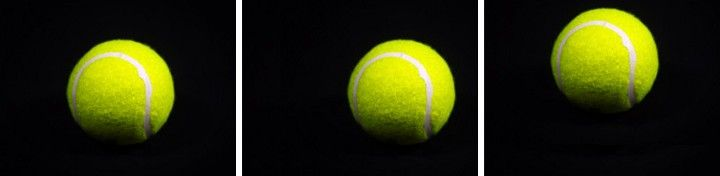



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Turn around (Flip)
2.   Rotation

1.   Scale
2.   Cutout

1.   Traslation
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:



*   The changes in the image (translations) through the arguments **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** y **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness using the argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [1]:
import matplotlib.pyplot as plt    #Library that allows graphing, very MATLAB style
import numpy as np                  #Library that allows working with arrangement  
from numpy import expand_dims       #Expand the array shape 
from keras.preprocessing.image import load_img    #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #will take a picture (PIL) and convert it to a matrix. If part of a PNG image, the values within the image will be between 0 and 255.
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica

First we upload an image from the internet

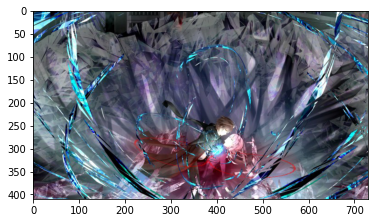

In [2]:
url = 'https://cdn.hipwallpaper.com/m/39/28/HIbeKh.jpg' 
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.


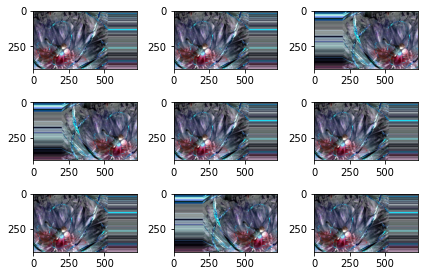

In [8]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image rotation means reversing rows or columns of pixels in the case of a vertical or horizontal rotation, respectively. The magnification is specified by a **horizontal_flip** o **vertical_flip** for the class **ImageDataGenerator**.

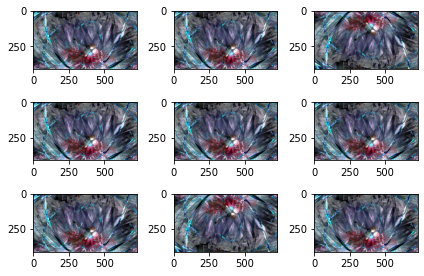

In [10]:
datagen = ImageDataGenerator(vertical_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower bound, upper bound] = [1-zoom_range, 1 + zoom_range]

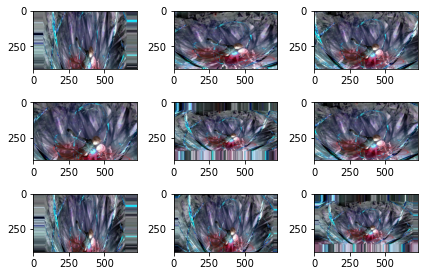

In [11]:
datagen = ImageDataGenerator(zoom_range=0.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The image is randomly rotated clockwise by a certain number of degrees from 0 to 360. You may rotate pixels outside the image frame and leave areas of the frame without pixel data, which need to be completed.

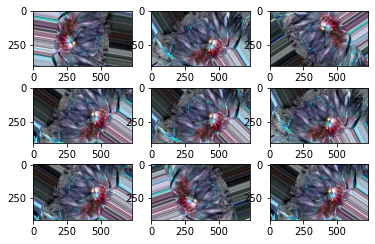

In [12]:
datagen = ImageDataGenerator(rotation_range=200)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

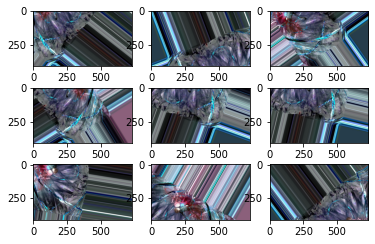

In [13]:
datagen = ImageDataGenerator(
            rotation_range               = 180,
            width_shift_range            = [150,150],   
            height_shift_range           = [200,200],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the work needed is not so simple given the inherent complexity of language (we cannot replace each word with its synonym and even if we do, we run the risk that the meaning of prayer will change completely.
There are some libraries that can help us do this, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

The Keras ImageDataGenerator class is not an “additive” operation. It’s not taking the original data, randomly transforming it, and then returning both the original data and transformed data. Instead, the ImageDataGenerator accepts the original data, randomly transforms it, and returns only the new, transformed data.

1. Image data augmentation is used to expand the training dataset in order to improve the performance and ability of the model to generalize.

2. Image data augmentation is supported in the Keras deep learning library via the ImageDataGenerator class.

Supported image formats: jpeg, png, bmp, gif. Animated gifs are truncated to the first frame.

**Arguments**

* **directory:** Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class. Otherwise, the directory structure is ignored.

* **labels:** Either "inferred" (labels are generated from the directory structure), or a list/tuple of integer labels of the same size as the number of image files found in the directory. Labels should be sorted according to the alphanumeric order of the image file paths (obtained via os.walk(directory) in Python).

* **label_mode:** - 'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss). - 'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss). - 'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy). - None (no labels).

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [14]:
!pip install textattack

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 778kB 8.6MB/s 
     |████████████████████████████████| 153kB 18.5MB/s 
     |████████████████████████████████| 235kB 15.0MB/s 
     |████████████████████████████████| 1.1MB 18.2MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 317kB 19.4MB/s 
     |████████████████████████████████| 245kB 30.0MB/s 
     |████████████████████████████████| 1.7MB 26.3MB/s 
     |████████████████████████████████| 102kB 10.1MB/s 
     |████████████████████████████████| 686kB 39.8MB/s 
     |████████████████████████████████| 3.0MB 15.6MB/s 
     |████████████████████████████████| 61kB 6.5MB/s 
     |████████████████████████████████| 17.3MB 232kB/s 
     |████████████████████████████████| 245kB 30.5MB/s 
     |████████████████████████████████| 1.1MB 42.2MB/s 
     |████████████████████████████████| 890kB 43.5MB/s 
     |████████████████████████████████| 19.7MB 1.2MB/s

In [17]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

In [18]:
text = "People cannot get rid of sadness, because all people are fundamentally alone."

TextAttack provides us with four methods for data augmentation.


## WordNetAugmenter
The text increases replacing it with synonymous of the thesaurus (dictionary of synonymous) of WordNet.

WordNet is a lexical database of English. The nouns, verbs, adjectives and adverbs group in sets of synonymous cognitive (synsets), each of which expresses a different concept. WordNet looks alike superficially to a thesaurus, since it groups the words according to its meaning.



In [26]:
aug = WordNetAugmenter();
aug.augment(text)

['People cannot get rid of sadness, because all multitude are fundamentally alone.']


## EmbeddingAugmenter
 Increases text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [30]:
aug = EmbeddingAugmenter();
aug.augment(text)

['People cannot get extricate of sadness, because all people are fundamentally alone.']

## CharSwapAugmenter
Increases text by replacing, deleting, inserting, and exchanging adjacent characters.

In [34]:
aug = CharSwapAugmenter()
aug.augment(text)

['People cannot egt rid of sadness, because all people are fundamentally alone.']


## EasyDataAugmenter
This augments text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All of these 4 features happen randomly. Then we'll get different results every time we run the code. This returns 4 increased results, unlike the other methods.


In [35]:
aug = EasyDataAugmenter()
aug.augment(text)

['People cannot get rid of sadness, because all people alone fundamentally are.',
 'People cannot get rid of sadness, because all people are basically alone.',
 'People cannot get rid of sadness, because free all people are fundamentally alone.',
 'People cannot get rid sadness, because all people are fundamentally alone.']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the [translate()** method are:



1. **src**: Source language. this parameter is optional as **googletrans** will detect it.
2. **dest**: Target language. Required parameter.

1.   **text**: The text to be translated from the source language to the target language. Required parameter.





 



When using this method what happens is a retraction, we move from the original language to a destination language and then return to the original, during this retrotraduction, there is a slight change in the sentence between the original text and the back-translated text, but the general meaning of the sentence is still preserved.

Supported languages can be queried in https://cloud.google.com/translate/docs/languages?hl=es

For best results it is recommended to do some tests with languages, if the target language is very similar the translation does not lose information, however you may have the problem that the translation is too literal, this becomes a bit of a test and error problem.


Some Language examples:


* Afrikaans 'af'

* Chinese (simplified) 'zh-CN or zh'

* Esperanto 'eo'

* Japanese 'ja'
* Latin "the"


* Spanish 'is'


* Turkman 'tk'


* Yiddish 'yi'

* Zulu 'zu'



In [36]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.7MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 972kB 8.4MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
     |████████████████████████████████| 102kB 9.7MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=b49c44e330844a9c1a828f144ec63c12f9b223314c9b00e2016fd2f22d7a2df2
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=c598d989c27daebd60c6ed917e536f00571e1f2868ce1f2b4f5b37603def83cd
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [37]:
from googletrans import Translator
translator = Translator()

In [39]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
最初はうまくいかない場合は、もう一度やり直してください。
If it doesn't work at first, try again.


In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If you did not succeed at first, try again.
